In [24]:
import numpy as np
X_train = np.load("reshaped_14.npy")

In [25]:
hidden_nodes = 200
epochs = 10
lr = 1e-4
input_size = 196
X = X_train.reshape(60000,input_size)
samples = 60000
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return (np.matmul(W.T,x.reshape(len(x),1)) + b)

# def sq_err(y,Y):
#     return (y-Y)**2
# Initializing weights

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(hidden_nodes,1))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(input_size,1))

In [26]:
for i in range(epochs):
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    for j in range(samples):
        #forward path
        out1 = layer(X[j],W1,Bi1)
        z = sigm(out1)
        out2 = layer(z,W2,Bi2)
        y = sigm(out2)
        #backpropagation
        temp = 2*(y-X[j].reshape(np.shape(y)))*diff_sigm(out2)
        b2 += temp
        w2 += np.matmul(z,temp.T)
        loss = np.linalg.norm(y-X[j])**2
        b1 += np.multiply(np.matmul(W2,temp),diff_sigm(out1))
        w1 += np.matmul(X[j].reshape(input_size,1),b1.T)
    print(loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [15]:
# import matplotlib.pyplot as plt

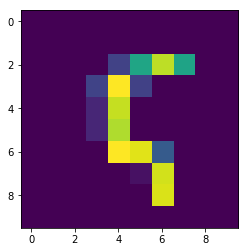

In [22]:
# plt.imshow(X_train[100])